In [188]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score

In [189]:
# Construct counterexample distribution
# thresholds for changes in P(Y = 1 | X1)
n_samples = 1000
thresh1 = 3.25
thresh2 = 6
thresh3 = 6.6 # this is the "agreement knob": higher = less agreement, up to 7
threshg3 = 6.5

X1 = np.random.uniform(0, 8, size=(n_samples,1))
X2 = np.random.choice([0, 1], size=(n_samples,1))
X = np.concatenate((X1, X2), axis=1)

# labels generated according to thresholds
y = np.zeros(n_samples)
y[np.where((X[:,0] > thresh1) & (X[:,0] < thresh2))] = 1
y[np.where(X[:, 0] > thresh3)] = 1

# Groups
g1_disjoint = np.where((X[:,0] > 0) & (X[:,0] < thresh3) & (X[:,1] == 0.))
g1g2 = np.where((X[:,0] > thresh2) & (X[:,0] < thresh3))
g2_disjoint = np.where((X[:,0] > 0) & (X[:,0] < thresh3) & (X[:,1] == 1.))

g1 = np.union1d(g1_disjoint, g1g2)
g2 = np.union1d(g2_disjoint, g1g2)
g3 = np.where((X[:,0] > threshg3))
g1g2g3 = np.intersect1d(g1g2, g3)

#plt.scatter(X1[g1], X2[g1], alpha=0.9, color="darkcyan")
#plt.scatter(X1[g2], X2[g2], alpha=0.5, color="lightcoral")
#plt.scatter(X1[g3], X2[g3], alpha=0.5, color="purple" )

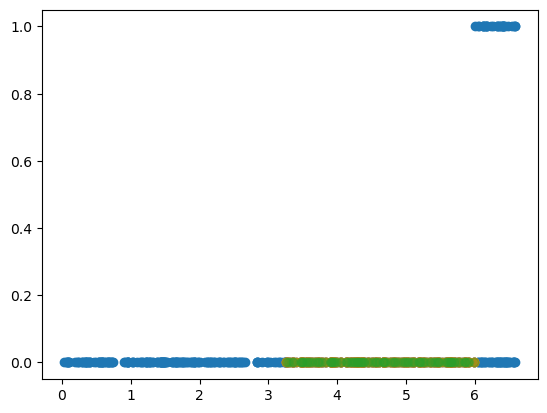

In [191]:
# Sanity check g1
y1 = np.where(y == 1)
plt.scatter(X[g1][:,0], X[g1][:,1])
plt.scatter(X[np.intersect1d(y1, g1)][:,0], X[np.intersect1d(y1,g1)][:,1])

modelg1 = DecisionTreeClassifier()
modelg1.fit(X[g1], y[g1])
ypredg1 = modelg1.predict(X)
ypredg1 = np.where(ypredg1 == 1)

plt.scatter(X[np.intersect1d(ypredg1, g1)][:,0], 
            X[np.intersect1d(ypredg1,g1)][:,1], alpha=0.25)

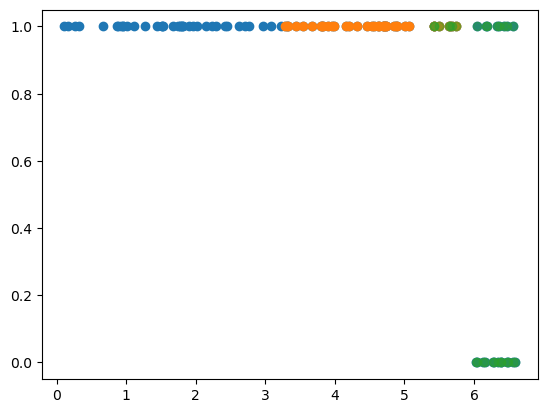

In [176]:
# Sanity check g2
y1 = np.where(y == 1)
plt.scatter(X[g2][:,0], X[g2][:,1])
plt.scatter(X[np.intersect1d(y1, g2)][:,0], X[np.intersect1d(y1,g2)][:,1])

modelg2 = LogisticRegression()
modelg2.fit(X1[g2], y[g2])
ypredg2 = modelg2.predict(X1)
ypredg2 = np.where(ypredg2 == 1)

plt.scatter(X[np.intersect1d(ypredg2, g2)][:,0], 
            X[np.intersect1d(ypredg2,g2)][:,1], alpha=0.5)

In [177]:
accuracy_score(modelg1.predict(X1[g1g2]), modelg2.predict(X1[g1g2]))

1.0

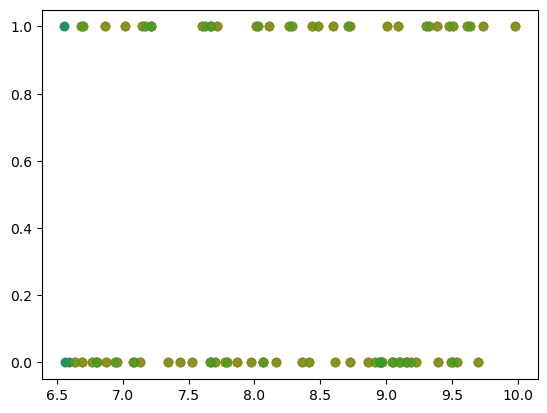

In [178]:
# Sanity check g3
y1 = np.where(y == 1)
plt.scatter(X[g3][:,0], X[g3][:,1])
plt.scatter(X[np.intersect1d(y1, g3)][:,0], X[np.intersect1d(y1,g3)][:,1])

modelg3 = LogisticRegression()
modelg3.fit(X1[g3], y[g3])
ypredg3 = modelg3.predict(X1)
ypredg3 = np.where(ypredg3 == 1)

plt.scatter(X[np.intersect1d(ypredg3, g3)][:,0], 
            X[np.intersect1d(ypredg3,g3)][:,1], alpha=0.5)

In [179]:
accuracy_score(modelg1.predict(X1[g1g2g3]), modelg3.predict(X1[g1g2g3]))

1.0

In [180]:
modelg1.predict(X1[g1g2g3])

array([1., 1., 1.])

In [181]:
modelg3.predict(X1[g1g2g3])

array([1., 1., 1.])

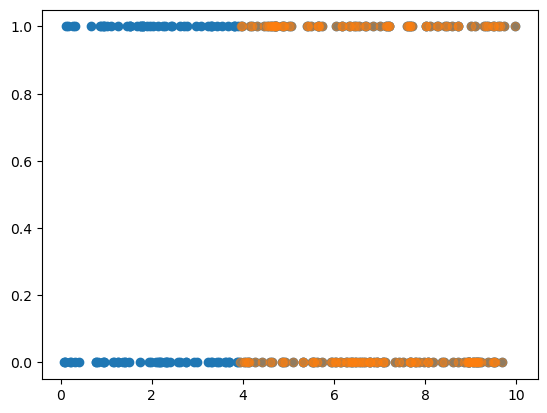

In [182]:
clf1 = LogisticRegression(random_state=1)
clf2 = LogisticRegression(random_state=1)
clf3 = LogisticRegression(random_state=1)
voting = VotingClassifier(estimators=[('lr1', clf1), ('lr2', clf2), ('lr3', clf3)], voting='hard')
voting = voting.fit(X1, y)
plt.scatter(X[:,0], X[:,1])
ypred = voting.predict(X1)
ypred = np.where(ypred == 1)

plt.scatter(X[ypred][:,0], 
            X[ypred][:,1], alpha=0.5)

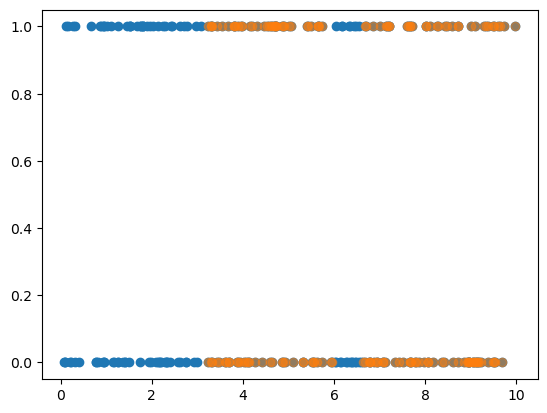

In [183]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X, y)
plt.scatter(X[:,0], X[:,1])
ypred = rf.predict(X)
ypred = np.where(ypred == 1)

plt.scatter(X[ypred][:,0], 
            X[ypred][:,1], alpha=0.5)

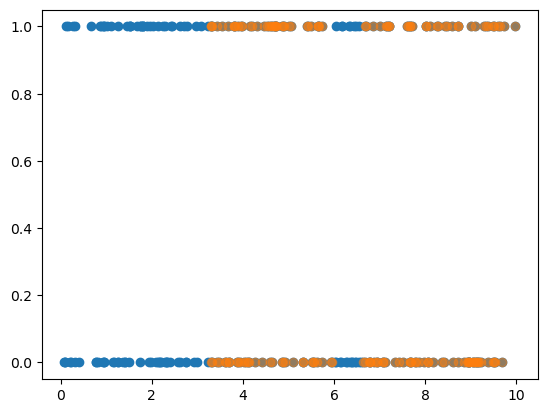

In [184]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[y1][:,0], 
            X[y1][:,1], alpha=0.5)